# pH regression & classification with SVM

In [1]:
import numpy as np
import pandas as pd
from load_data import LoadData
from sklearn.utils import shuffle
df = LoadData(37).load_data()
df = shuffle(df)
df.head()

no image
no image
no image
no image
no image
no image


,blue,green,red,label
373,40,83,240,1
414,213,65,43,12
358,42,83,239,1
334,0,204,51,7
12,180,38,51,12


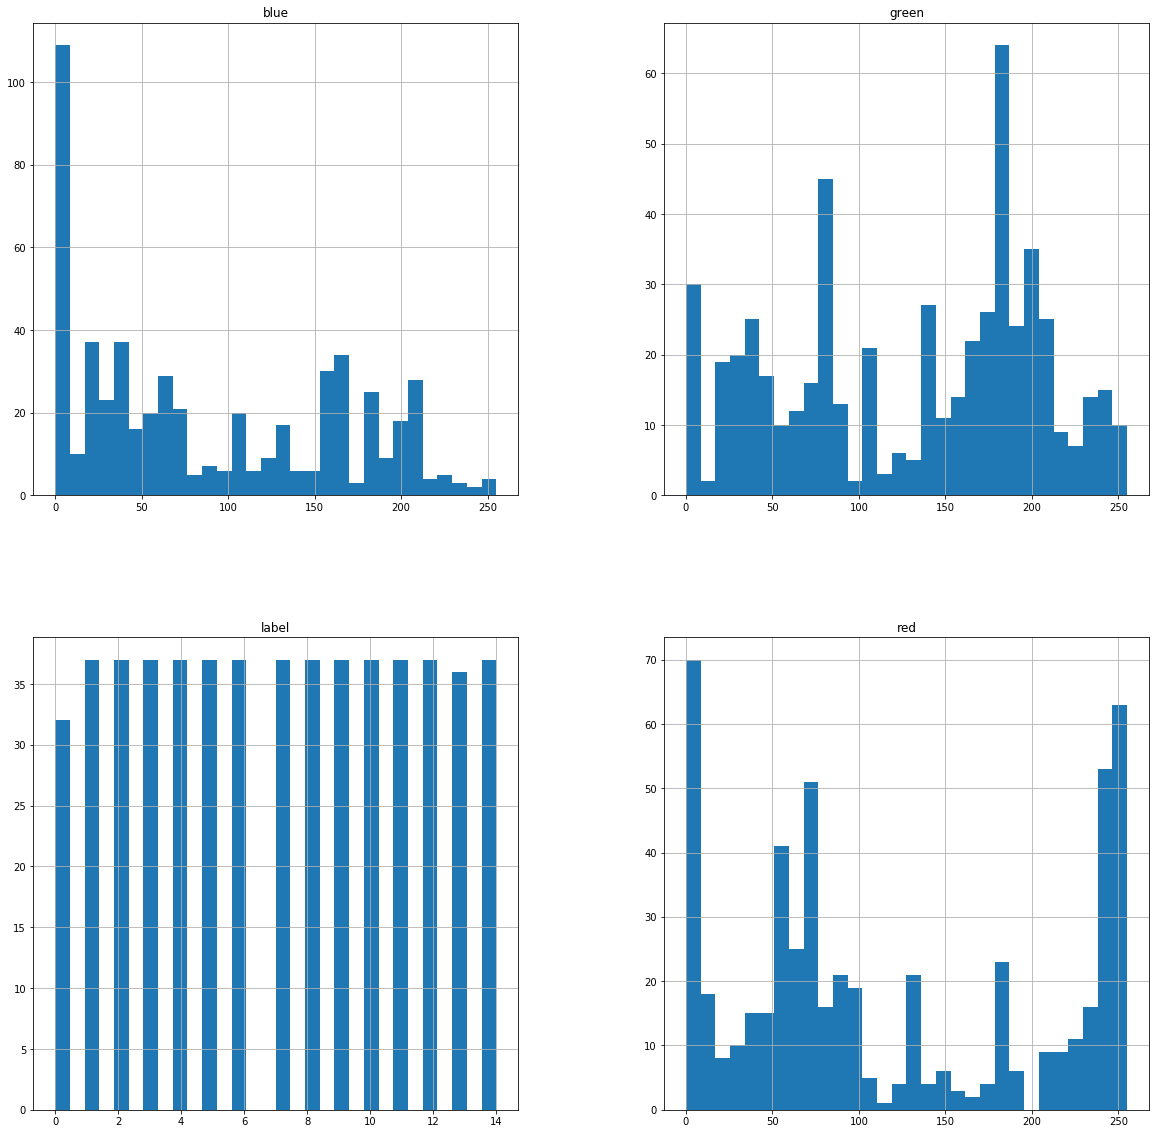

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=30,figsize=(20,20))
plt.show()

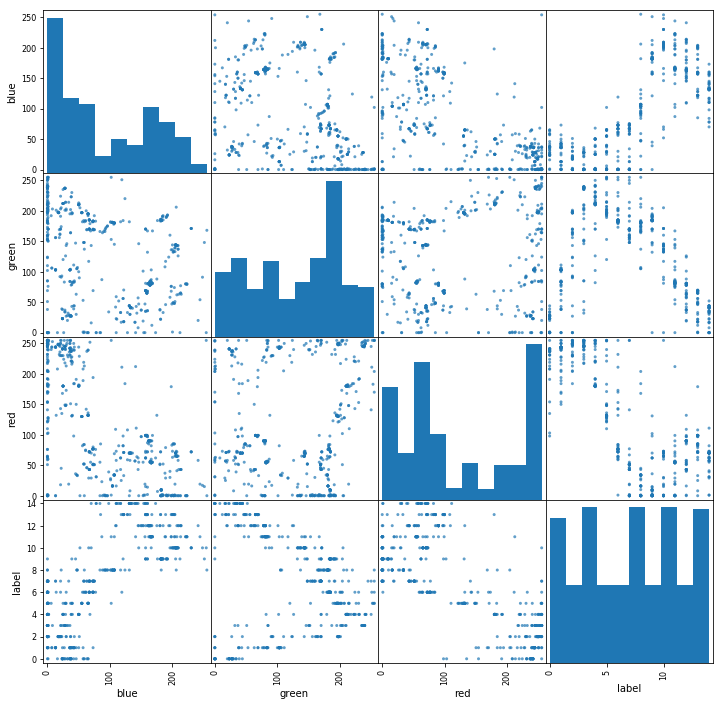

In [3]:
from pandas.plotting import scatter_matrix 
attributes = ['blue', 'green', 'red', 'label']
scatter_matrix(df[attributes], figsize=(12,12), alpha=0.7)
plt.show()

## Split data

In [4]:
X = df.drop('label', axis=1)
y = np.array(df['label'])
X.shape, y.shape

((549, 3), (549,))

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### LinearSVR

In [6]:
pipe_svm = Pipeline((
    ('scaler', StandardScaler()),
    ('lin_svr', LinearSVR(epsilon=1.5))
))
pipe_svm.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_svr', LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [7]:
y_predict = pipe_svm.predict(x_test)
def test(clf):
    accuracy = 0
    for i in range(len(x_test)):
        print('Predict {:.2f}, labels {}'.format(y_predict[i],y_test[i]))
test(pipe_svm)

Predict 3.27, labels 2
Predict 12.70, labels 10
Predict 3.82, labels 2
Predict 2.92, labels 4
Predict 11.70, labels 9
Predict 9.02, labels 14
Predict 10.77, labels 11
Predict 5.21, labels 5
Predict 11.72, labels 9
Predict 4.71, labels 0
Predict 5.71, labels 6
Predict 9.11, labels 8
Predict 2.69, labels 2
Predict 3.10, labels 4
Predict 9.11, labels 8
Predict 6.77, labels 6
Predict 3.46, labels 4
Predict 3.29, labels 2
Predict 13.60, labels 10
Predict 3.06, labels 6
Predict 11.06, labels 10
Predict 7.96, labels 7
Predict 9.65, labels 13
Predict 3.91, labels 0
Predict 10.41, labels 14
Predict 5.79, labels 5
Predict 9.76, labels 14
Predict 12.53, labels 10
Predict 9.82, labels 14
Predict 1.65, labels 2
Predict 11.92, labels 13
Predict 5.20, labels 5
Predict 3.82, labels 5
Predict 10.67, labels 11
Predict 9.17, labels 8
Predict 11.12, labels 13
Predict 9.00, labels 13
Predict 3.71, labels 4
Predict 2.77, labels 2
Predict 10.68, labels 11
Predict 3.24, labels 1
Predict 3.98, labels 0
Predict

### Measure mean_squared_error

In [8]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predict)

6.078356953453761

### Polynomial kernel

In [9]:
from sklearn.svm import SVR

pip_svr = Pipeline((
    ('scaler', StandardScaler()),
    ('lin_svr', SVR(kernel='poly', degree=3, C=100, epsilon=0.1))
))
pip_svr.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_svr', SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [10]:
y_predict_svr = pip_svr.predict(x_test)
mean_squared_error(y_test, y_predict_svr)

7.800505494732096

In [57]:
#

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.svm import SVC

svm_clf = SVC(decision_function_shape="ovr")
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=5.369236428413201, gamma=0.028053958595246477 .................
[CV] .. C=5.369236428413201, gamma=0.028053958595246477, total=   0.0s
[CV] C=5.369236428413201, gamma=0.028053958595246477 .................
[CV] .. C=5.369236428413201, gamma=0.028053958595246477, total=   0.0s
[CV] C=5.369236428413201, gamma=0.028053958595246477 .................
[CV] .. C=5.369236428413201, gamma=0.028053958595246477, total=   0.0s
[CV] C=3.365176208240377, gamma=0.029744991452313567 .................
[CV] .. C=3.365176208240377, gamma=0.029744991452313567, total=   0.0s
[CV] C=3.365176208240377, gamma=0.029744991452313567 .................
[CV] .. C=3.365176208240377, gamma=0.029744991452313567, total=   0.0s
[CV] C=3.365176208240377, gamma=0.029744991452313567 .................
[CV] .. C=3.365176208240377, gamma=0.029744991452313567, total=   0.0s
[CV] C=1.6100088822247896, gamma=0.05655482260608991 .................
[CV] .. C=1.6100

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1.6100088822247896, gamma=0.05655482260608991 .................
[CV] .. C=1.6100088822247896, gamma=0.05655482260608991, total=   0.0s
[CV] C=1.6100088822247896, gamma=0.05655482260608991 .................
[CV] .. C=1.6100088822247896, gamma=0.05655482260608991, total=   0.0s
[CV] C=7.854325282968908, gamma=0.003302307487485608 .................
[CV] .. C=7.854325282968908, gamma=0.003302307487485608, total=   0.0s
[CV] C=7.854325282968908, gamma=0.003302307487485608 .................
[CV] .. C=7.854325282968908, gamma=0.003302307487485608, total=   0.0s
[CV] C=7.854325282968908, gamma=0.003302307487485608 .................
[CV] .. C=7.854325282968908, gamma=0.003302307487485608, total=   0.0s
[CV] C=2.1303301967740467, gamma=0.014997971472751228 ................
[CV] . C=2.1303301967740467, gamma=0.014997971472751228, total=   0.0s
[CV] C=2.1303301967740467, gamma=0.014997971472751228 ................
[CV] . C=2.1303301967740467, gamma=0.014997971472751228, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002E02570FAC8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002E02570FCF8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [12]:
rnd_search_cv.best_estimator_

SVC(C=8.159051169788128, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001245549978602239,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
rnd_search_cv.best_score_

0.7530364372469636

In [14]:
rnd_search_cv.best_estimator_.fit(x_train, y_train)

SVC(C=8.159051169788128, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001245549978602239,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
from sklearn.metrics import accuracy_score
y_pred_rnd = rnd_search_cv.best_estimator_.predict(x_test)
print(accuracy_score(y_test, y_pred_rnd))

0.7636363636363637


In [16]:
mean_squared_error(y_test, y_pred_rnd)

1.7454545454545454

### Save model

In [17]:
from sklearn.externals import joblib
# joblib.dump(rnd_search_cv, 'rnd_search_cv_82%.pkl')